In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./electricity_markets/PJM_braidwood/historical_prices.csv')
#df.set_index(['Year','hour'], inplace=True)
#df.sort_index(inplace=True)
df.sort_values(by=['Year', 'hour'], inplace=True)
df.tail()

,hour,historical price,Year
87595,8756.0,28.52,2021
87596,8757.0,26.37,2021
87597,8758.0,24.87,2021
87598,8759.0,24.80,2021
87599,8760.0,22.59,2021


In [3]:
new_df = pd.DataFrame()
for year in range(2012, 2022):
  temp_df = df[df['Year']==year]
  start = str(year)+'-01-01'
  temp_df['ts'] = pd.Timestamp(start)+pd.to_timedelta(df.hour, unit='H')
  new_df = pd.concat([new_df,temp_df],axis=0)


/var/folders/jg/prtgf89s4pdg1hvqkfp4rdqr5yv39x/T/ipykernel_3777/287729400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ts'] = pd.Timestamp(start)+pd.to_timedelta(df.hour, unit='H')
/var/folders/jg/prtgf89s4pdg1hvqkfp4rdqr5yv39x/T/ipykernel_3777/287729400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ts'] = pd.Timestamp(start)+pd.to_timedelta(df.hour, unit='H')
/var/folders/jg/prtgf89s4pdg1hvqkfp4rdqr5yv39x/T/ipykernel_3777/287729400.py:5: SettingWithCopyWarning: 
A value is tr

In [4]:
new_df.head()

,hour,historical price,Year,ts
35040,1.0,25.17,2012,2012-01-01 01:00:00
35041,2.0,22.13,2012,2012-01-01 02:00:00
35042,3.0,21.15,2012,2012-01-01 03:00:00
35043,4.0,21.12,2012,2012-01-01 04:00:00
35044,5.0,20.57,2012,2012-01-01 05:00:00


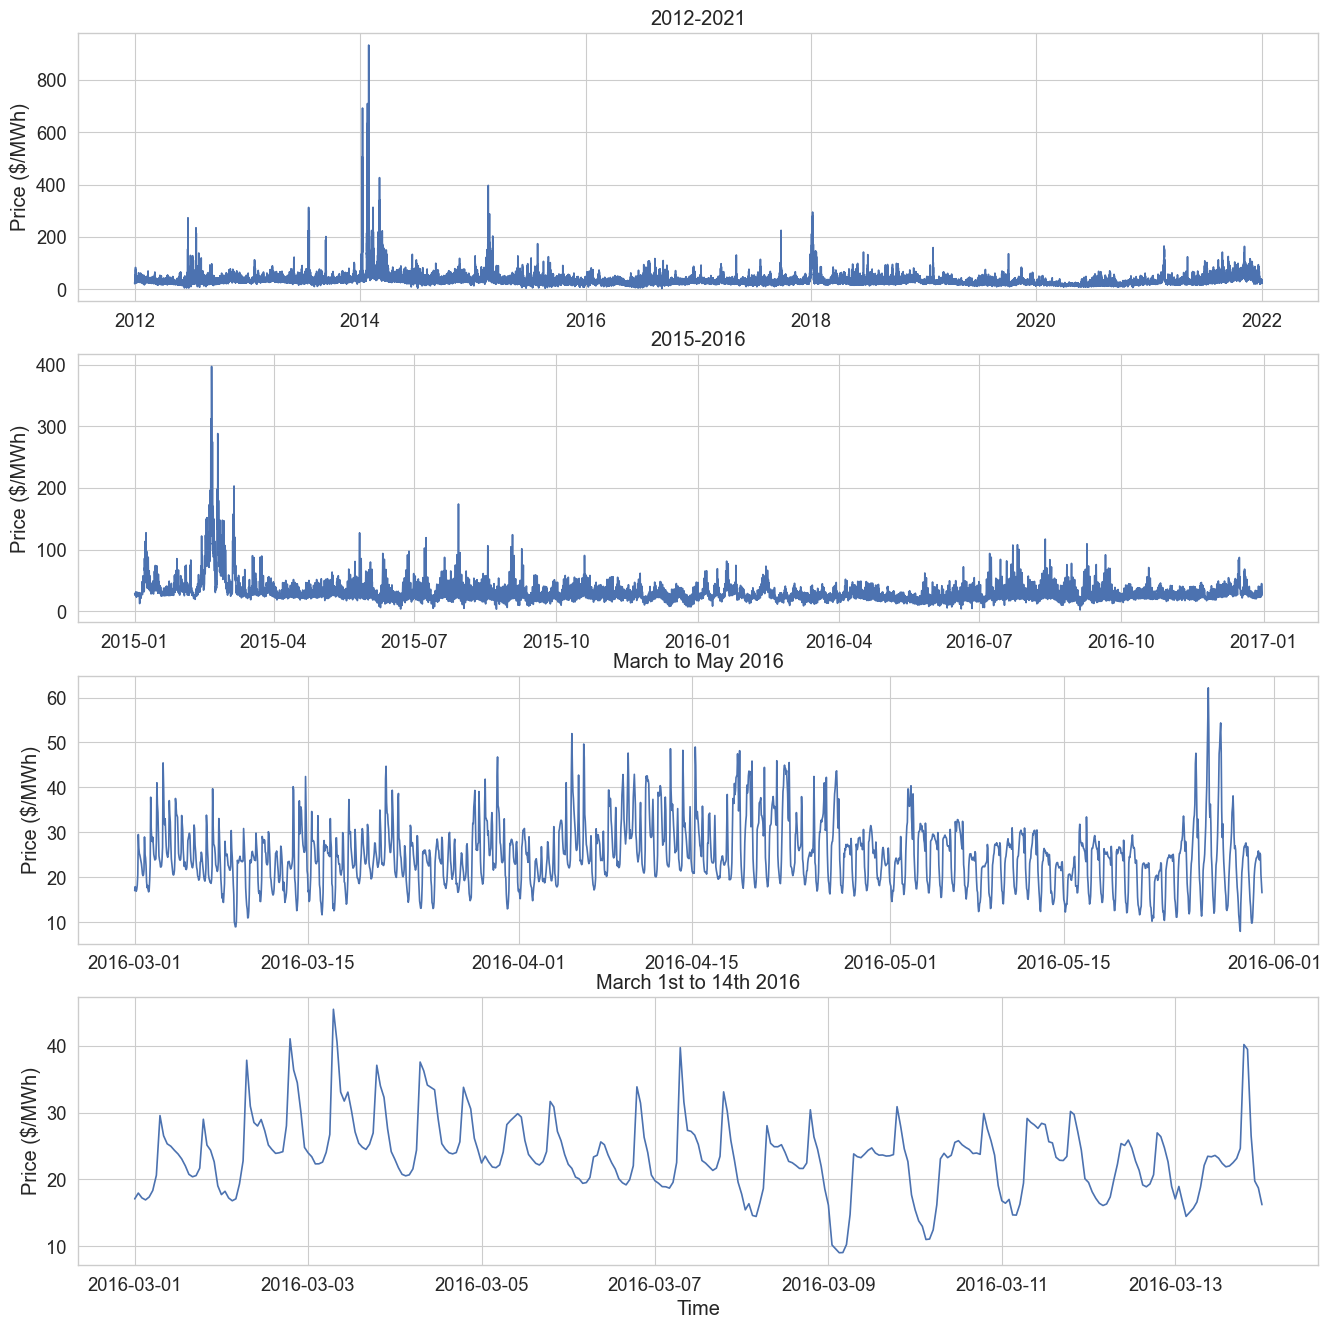

In [6]:
sns.set_theme(style='whitegrid')
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(4,1, figsize=(16,16))
g0 = sns.lineplot(x='ts', y='historical price', data=new_df,ax=ax[0])
g0.set(xlabel='', ylabel='Price ($/MWh)')
ax[0].set_title('2012-2021')

df_2016 = new_df[(new_df['ts']>='2015-01-01')&(new_df['ts']<='2016-12-31')]
g1 = sns.lineplot(x='ts', y='historical price', data=df_2016, ax=ax[1])
g1.set(xlabel='', ylabel='Price ($/MWh)')
ax[1].set_title('2015-2016')

df_march = new_df[(new_df['ts']>='2016-03-01')&(new_df['ts']<='2016-05-31')]
g2 = sns.lineplot(x='ts', y='historical price', data=df_march, ax=ax[2])
g2.set(xlabel='', ylabel='Price ($/MWh)')
ax[2].set_title('March to May 2016')

df_week = new_df[(new_df['ts']>='2016-03-01')&(new_df['ts']<='2016-03-14')]
g3 = sns.lineplot(x='ts', y='historical price', data=df_week, ax=ax[3])
g3.set(xlabel='Time', ylabel='Price ($/MWh)')
ax[3].set_title('March 1st to 14th 2016')

plt.savefig('./electricity_markets/PJM_braidwood/2012_2012_historical.png')